In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
banknote_authentication = fetch_ucirepo(id=267)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets


In [3]:
X = X[['variance', 'skewness']]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_scaled, y_train.values.ravel())

SVC(kernel='linear')

In [7]:
y_pred = svm_model.predict(X_test_scaled)


In [8]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nDetailed Metrics:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")

Confusion Matrix:
[[135  13]
 [ 28  99]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       148
           1       0.88      0.78      0.83       127

    accuracy                           0.85       275
   macro avg       0.86      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275


Detailed Metrics:
Accuracy:  0.8509
Precision: 0.8839
Recall:    0.7795
F1 Score:  0.8285


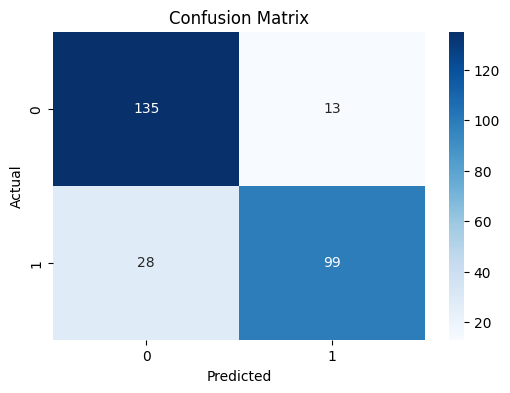

In [9]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
X_combined_scaled = np.vstack((X_train_scaled, X_test_scaled))
y_combined = np.hstack((y_train.values.ravel(), y_test.values.ravel()))

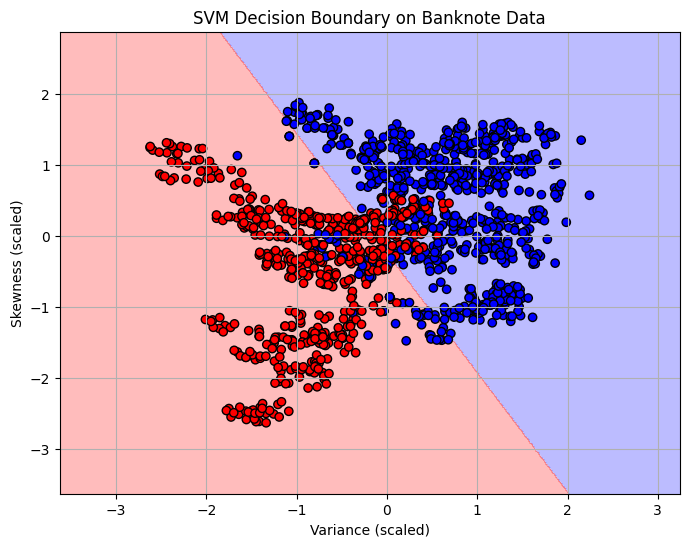

In [11]:
# Create grid to evaluate model
x_min, x_max = X_combined_scaled[:, 0].min() - 1, X_combined_scaled[:, 0].max() + 1
y_min, y_max = X_combined_scaled[:, 1].min() - 1, X_combined_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X_combined_scaled[:, 0], X_combined_scaled[:, 1], c=y_combined, cmap='bwr', edgecolors='k')
plt.xlabel('Variance (scaled)')
plt.ylabel('Skewness (scaled)')
plt.title('SVM Decision Boundary on Banknote Data')
plt.grid(True)
plt.show()
